# Customer Lifetime Value Prediction Using Python

### Importing the Libraries

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



# LIBRARIES TO IGNORE WARNINGS
import warnings as w
w.filterwarnings('ignore')

### Importing the dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Online_Retail.csv')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Filtering based on key assumptions

### 2-3 years customers transaction data

In [ ]:
data['InvoiceDate'].unique()

array(['01-12-2010 08:26', '01-12-2010 08:28', '01-12-2010 08:34', ...,
       '09-12-2011 12:31', '09-12-2011 12:49', '09-12-2011 12:50'],
      dtype=object)

We can see that we have only 2 years transaction data ... so it is already filtered

### Take only positive sale transaction

In [ ]:
data.Quantity.min()  # checking negative value in Quantity column


-80995

In [ ]:
data.UnitPrice.min() # checking negative value in unitprice column

-11062.06

In [ ]:
#Filter out records with negative values
data = data[(data['Quantity']>0)]

In [ ]:
#Filter out records with negative values
data = data[(data['Quantity']>0)]

In [ ]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


### Take last 1-year customer data

In [ ]:
data=data[data['InvoiceDate'] >= '2011-01-01']
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
39641,539658,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,21-12-2010 09:34,2.95,17213.0,United Kingdom
39642,539658,84949,SILVER HANGING T-LIGHT HOLDER,6,21-12-2010 09:34,1.65,17213.0,United Kingdom
39643,539658,21756,BATH BUILDING BLOCK WORD,3,21-12-2010 09:34,5.95,17213.0,United Kingdom
39644,539658,22977,DOLLY GIRL CHILDRENS EGG CUP,12,21-12-2010 09:34,1.25,17213.0,United Kingdom
39645,539658,84032B,CHARLIE + LOLA RED HOT WATER BOTTLE,6,21-12-2010 09:34,2.95,17213.0,United Kingdom
...,...,...,...,...,...,...,...,...
516364,579885,85034C,3 ROSE MORRIS BOXED CANDLES,4,30-11-2011 17:37,1.25,15444.0,United Kingdom
516365,579885,21742,LARGE ROUND WICKER PLATTER,2,30-11-2011 17:37,5.95,15444.0,United Kingdom
516366,579885,23084,RABBIT NIGHT LIGHT,6,30-11-2011 17:37,2.08,15444.0,United Kingdom
516367,579885,21257,VICTORIAN SEWING BOX MEDIUM,1,30-11-2011 17:37,7.95,15444.0,United Kingdom


### Checking for missing values

In [ ]:
data.isnull()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
39641,False,False,False,False,False,False,False,False
39642,False,False,False,False,False,False,False,False
39643,False,False,False,False,False,False,False,False
39644,False,False,False,False,False,False,False,False
39645,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
516364,False,False,False,False,False,False,False,False
516365,False,False,False,False,False,False,False,False
516366,False,False,False,False,False,False,False,False
516367,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

InvoiceNo          0
StockCode          0
Description      216
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     40161
Country            0
dtype: int64

### Handling the missing values

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
39641,539658,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,21-12-2010 09:34,2.95,17213.0,United Kingdom
39642,539658,84949,SILVER HANGING T-LIGHT HOLDER,6,21-12-2010 09:34,1.65,17213.0,United Kingdom
39643,539658,21756,BATH BUILDING BLOCK WORD,3,21-12-2010 09:34,5.95,17213.0,United Kingdom
39644,539658,22977,DOLLY GIRL CHILDRENS EGG CUP,12,21-12-2010 09:34,1.25,17213.0,United Kingdom
39645,539658,84032B,CHARLIE + LOLA RED HOT WATER BOTTLE,6,21-12-2010 09:34,2.95,17213.0,United Kingdom


In [ ]:
data1 = data[data['CustomerID'].notnull() & data['Description'].notnull()]
data1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
39641,539658,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,21-12-2010 09:34,2.95,17213.0,United Kingdom
39642,539658,84949,SILVER HANGING T-LIGHT HOLDER,6,21-12-2010 09:34,1.65,17213.0,United Kingdom
39643,539658,21756,BATH BUILDING BLOCK WORD,3,21-12-2010 09:34,5.95,17213.0,United Kingdom
39644,539658,22977,DOLLY GIRL CHILDRENS EGG CUP,12,21-12-2010 09:34,1.25,17213.0,United Kingdom
39645,539658,84032B,CHARLIE + LOLA RED HOT WATER BOTTLE,6,21-12-2010 09:34,2.95,17213.0,United Kingdom
...,...,...,...,...,...,...,...,...
516364,579885,85034C,3 ROSE MORRIS BOXED CANDLES,4,30-11-2011 17:37,1.25,15444.0,United Kingdom
516365,579885,21742,LARGE ROUND WICKER PLATTER,2,30-11-2011 17:37,5.95,15444.0,United Kingdom
516366,579885,23084,RABBIT NIGHT LIGHT,6,30-11-2011 17:37,2.08,15444.0,United Kingdom
516367,579885,21257,VICTORIAN SEWING BOX MEDIUM,1,30-11-2011 17:37,7.95,15444.0,United Kingdom


In [ ]:
data1.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Exploratory Data Analysis

### EDA QUESTIONS

- Total amount with respect to each customer
- Products which are bought together the most
- Best time for the sale.
- Products that are sold with lowest and highest total amount
- Best and the worst weekdays by sales
- Amount of customer with respect to year and month
- Total revenue per month
- Top 20 Best countries by sale/revenue
- Top 20 Worst countries by sale/revenue
- Graph predicting the most loyal and inactive customer using RFM Data frame

#### Converting the invoice date into date time format

In [ ]:
data1['InvoiceDate'] = pd.to_datetime(data1['InvoiceDate'])

In [ ]:
data1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
39641,539658,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-21 09:34:00,2.95,17213.0,United Kingdom
39642,539658,84949,SILVER HANGING T-LIGHT HOLDER,6,2010-12-21 09:34:00,1.65,17213.0,United Kingdom
39643,539658,21756,BATH BUILDING BLOCK WORD,3,2010-12-21 09:34:00,5.95,17213.0,United Kingdom
39644,539658,22977,DOLLY GIRL CHILDRENS EGG CUP,12,2010-12-21 09:34:00,1.25,17213.0,United Kingdom
39645,539658,84032B,CHARLIE + LOLA RED HOT WATER BOTTLE,6,2010-12-21 09:34:00,2.95,17213.0,United Kingdom
...,...,...,...,...,...,...,...,...
516364,579885,85034C,3 ROSE MORRIS BOXED CANDLES,4,2011-11-30 17:37:00,1.25,15444.0,United Kingdom
516365,579885,21742,LARGE ROUND WICKER PLATTER,2,2011-11-30 17:37:00,5.95,15444.0,United Kingdom
516366,579885,23084,RABBIT NIGHT LIGHT,6,2011-11-30 17:37:00,2.08,15444.0,United Kingdom
516367,579885,21257,VICTORIAN SEWING BOX MEDIUM,1,2011-11-30 17:37:00,7.95,15444.0,United Kingdom


#### Certain preprocessing like finding the total amount for using quantity and unit price and splitting the date into year and month

In [ ]:
data1['TotalPrice'] = data1['Quantity']*data1['UnitPrice']
data1['Year'] = pd.DatetimeIndex(data1['InvoiceDate']).year
data1['Month'] = pd.DatetimeIndex(data1['InvoiceDate']).month
data1['Month'] = data1['Month'].replace((1,2,3,4,5,6,7,8,9,10,11,12), 
                                          ('January','February','March','April','May','June','July','August',
                                          'September','October','November','December'))


#### Total amount with respect to each customer

In [ ]:
data1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month
39641,539658,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-21 09:34:00,2.95,17213.0,United Kingdom,17.70,2010,December
39642,539658,84949,SILVER HANGING T-LIGHT HOLDER,6,2010-12-21 09:34:00,1.65,17213.0,United Kingdom,9.90,2010,December
39643,539658,21756,BATH BUILDING BLOCK WORD,3,2010-12-21 09:34:00,5.95,17213.0,United Kingdom,17.85,2010,December
39644,539658,22977,DOLLY GIRL CHILDRENS EGG CUP,12,2010-12-21 09:34:00,1.25,17213.0,United Kingdom,15.00,2010,December
39645,539658,84032B,CHARLIE + LOLA RED HOT WATER BOTTLE,6,2010-12-21 09:34:00,2.95,17213.0,United Kingdom,17.70,2010,December
...,...,...,...,...,...,...,...,...,...,...,...
516364,579885,85034C,3 ROSE MORRIS BOXED CANDLES,4,2011-11-30 17:37:00,1.25,15444.0,United Kingdom,5.00,2011,November
516365,579885,21742,LARGE ROUND WICKER PLATTER,2,2011-11-30 17:37:00,5.95,15444.0,United Kingdom,11.90,2011,November
516366,579885,23084,RABBIT NIGHT LIGHT,6,2011-11-30 17:37:00,2.08,15444.0,United Kingdom,12.48,2011,November
516367,579885,21257,VICTORIAN SEWING BOX MEDIUM,1,2011-11-30 17:37:00,7.95,15444.0,United Kingdom,7.95,2011,November


In [ ]:
data1['TotalPrice'] = data1['Quantity']*data1['UnitPrice']
data1['Year'] = pd.DatetimeIndex(data1['InvoiceDate']).year
data1['Month'] = pd.DatetimeIndex(data1['InvoiceDate']).month
data1['Month'] = data1['Month'].replace((1,2,3,4,5,6,7,8,9,10,11,12), 
                                          ('January','February','March','April','May','June','July','August',
                                          'September','October','November','December'))

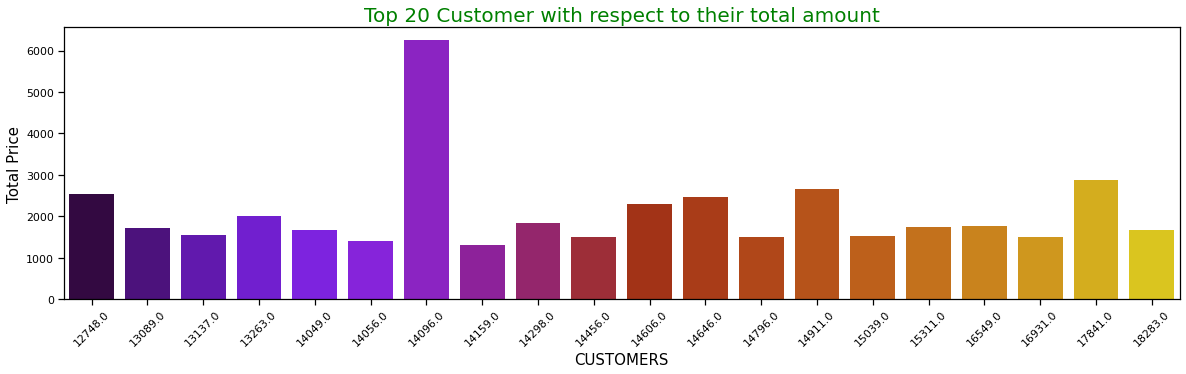

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x = data1.CustomerID.value_counts().head(20).index, y = data1.TotalPrice.value_counts().head(20).values, palette = 'gnuplot')
plt.xlabel('CUSTOMERS', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Total Price', size = 15)
plt.title('Top 20 Customer with respect to their total amount', color = 'green', size = 20)
plt.show()

- Customer with customer id 15287.690 has bought the most expensive product or products


### Products that are sold with lowest and highest total amount


#### TOP 25 SOLD PRODUCTS


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

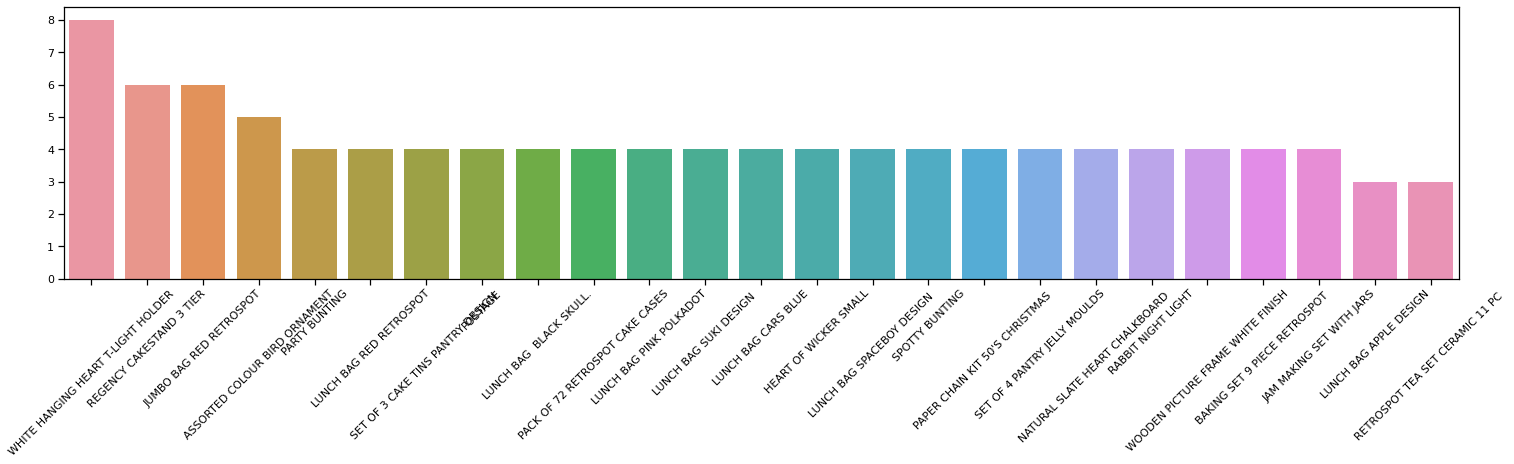

In [ ]:
fig = plt.figure(figsize=(25,5))

Products = data1.Description.value_counts().head(25).index
Count_of_products = data1.value_counts().head(25)
sns.barplot(x = Products, y = Count_of_products)
plt.xticks(rotation=45)

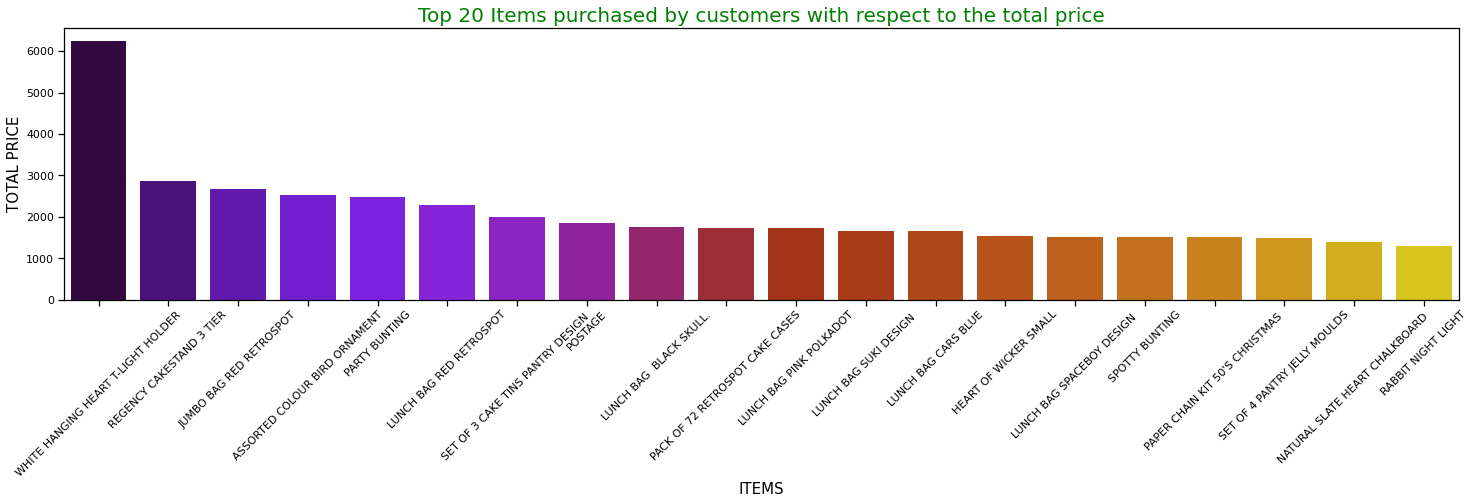

In [ ]:
plt.figure(figsize=(25,5))
sns.barplot(x = data1.Description.value_counts().head(20).index, y = data1.TotalPrice.value_counts().head(20).values, palette = 'gnuplot')
plt.xlabel('ITEMS', size = 15)
plt.xticks(rotation=45)
plt.ylabel('TOTAL PRICE', size = 15)
plt.title('Top 20 Items purchased by customers with respect to the total price', color = 'green', size = 20)
plt.show()

- From first 20 items we can see that the white hanging Heart T-Light Holder and Regency Cakestand 3 Tier are costlier than the other ones

### Best and the worst weekdays by sales

In [ ]:
data1['Hour'] = data1['InvoiceDate'].dt.hour
data1['WeekDay']=data1['InvoiceDate'].dt.weekday
data1['WeekDay'] = data1['WeekDay'].replace({0:'Mon', 1:'Tues',2:'Wed', 3:'Thur', 4:'Fri', 5:'Sat', 6:'Sun'})

In [ ]:
px.bar(data1.groupby('WeekDay').TotalPrice.sum().reset_index(), x='WeekDay', y='TotalPrice')

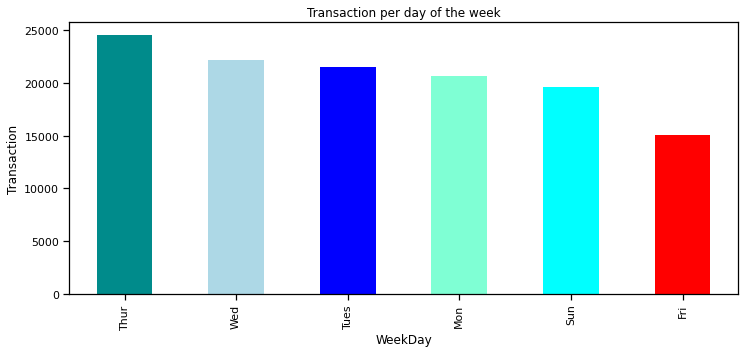

In [ ]:
coutbydayp=data1.groupby('WeekDay')['InvoiceNo'].count().reset_index()
coutbydayp.sort_values('WeekDay',inplace=True)

plt.figure(figsize=(12,5))
data1['WeekDay'].value_counts(dropna = False).plot.bar(color=['darkcyan','lightblue','blue','aquamarine', 'cyan','red', 'green'])
plt.xlabel('WeekDay')
plt.ylabel('Transaction')
plt.title('Transaction per day of the week')
plt.show()

In [ ]:
data1['WeekDay'].value_counts()

Thur    24509
Wed     22132
Tues    21542
Mon     20692
Sun     19599
Fri     15028
Name: WeekDay, dtype: int64

- The best weekday for sales is Thursday and the worst is Saturday

#### Amount spent by each customer with respect to year and month

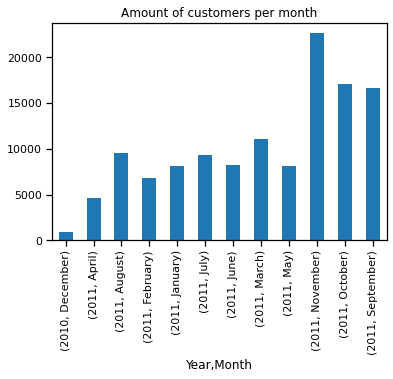

In [ ]:
data1.groupby(['Year', 'Month']).CustomerID.count().plot(kind='bar', title='Amount of customers per month')

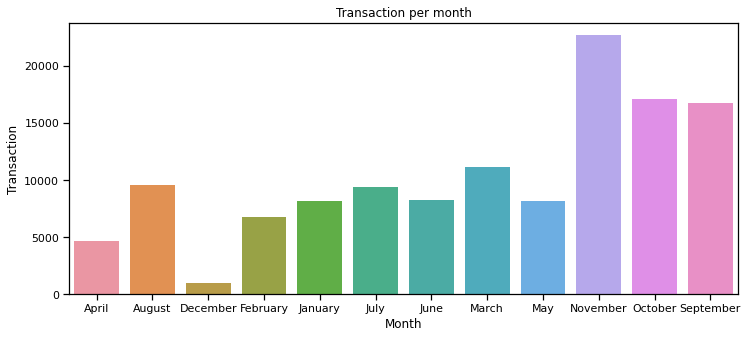

In [ ]:
coutbymonth=data1.groupby('Month')['InvoiceNo'].count().reset_index()
coutbymonth.sort_values('Month',inplace=True)

fig = plt.figure(figsize=(12,5))
sns.barplot(x=coutbymonth['Month'], y=coutbymonth['InvoiceNo'])
plt.xlabel('Month')
plt.ylabel('Transaction')
plt.title('Transaction per month')
plt.show()


#### Revenue per month

In [ ]:
px.bar(data1[['InvoiceDate','TotalPrice']].set_index('InvoiceDate').resample('M').sum().reset_index(),
       x='InvoiceDate', y='TotalPrice', title = 'Total Revenue per month')

- Getting knownledge about number of invoices, number of customers and  total revenue per month. The most active month is November.

#### Top Best 20 countries by sale/revenue


In [ ]:
px.pie(data1.groupby('Country').TotalPrice.sum().reset_index()[:20], values='TotalPrice', names='Country', 
      title='TOP BEST 20 COUNTRIES BY SALES')

- From the chart we can see that the best countries for sales are Eire and Germany

#### Worst 20 countries by sale/revenue

In [ ]:
px.pie(data1.groupby('Country').TotalPrice.sum().reset_index()[20:], values='TotalPrice', names='Country', 
      title='THE WORST 20 COUNTRIES BY SALES')

- From the chart we can see that the worst countries for sales are United Kingdom and Netherlands

#### Best time for the sale.

In [ ]:
px.bar(data1.groupby('Hour').TotalPrice.sum().reset_index(), x='Hour', y='TotalPrice')

- The best time for sales is 12 o'clock and near it

#### Products which are bought together the most

- We will implement market basket analysis along with apriori algorithm to find the products which are bought together the most
- Further we will use association rule to implement market basket analysis

#### MARKET BASKET ANALYSIS

In [ ]:
pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
transactions_str = data1.groupby(['InvoiceNo', 'Description'])['Description'].count().reset_index(name ='Count')
transactions_str

,InvoiceNo,Description,Count
0,539658,BATH BUILDING BLOCK WORD,1
1,539658,CHARLIE + LOLA RED HOT WATER BOTTLE,1
2,539658,CHARLIE+LOLA PINK HOT WATER BOTTLE,1
3,539658,DOLLY GIRL CHILDRENS EGG CUP,1
4,539658,DOORMAT ENGLISH ROSE,1
...,...,...,...
120430,579885,WOODEN FRAME ANTIQUE WHITE,1
120431,579885,WOODEN PICTURE FRAME WHITE FINISH,1
120432,579885,ZINC BOX SIGN HOME,1
120433,579885,ZINC T-LIGHT HOLDER STAR LARGE,1


In [ ]:
basket = (data1[data1['Country'] =="France"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [ ]:
# making a mxn matrice where m=transaction and n=items and each row represents 
#whether the item was in the transaction or not
my_basket = transactions_str.pivot_table(index='InvoiceNo', columns='Description', values='Count', aggfunc='sum').fillna(0)


my_basket.head()

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
539658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539659,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# making a function which returns 0 or 1
# 0 means item was not in that transaction, 1 means item present in that transaction

def encode(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

# applying the function to the dataset

my_basket_sets = my_basket.applymap(encode)
my_basket_sets.head()

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
539658,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539659,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539660,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539662,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539663,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# using the 'apriori algorithm' with min_support=0.01 (1% of 9465)
# It means the item should be present in atleast 94 transaction out of 9465 transactions only when we considered that item in
# frequent itemset

# using the 'apriori algorithm' with min_support=0.01 (1% of 9465)
# It means the item should be present in atleast 94 transaction out of 9465 transactions only when we considered that item in
# frequent itemset
frequent_items = apriori(my_basket_sets, min_support = 0.02,use_colnames = True).sort_values(by='support',ascending=False)
frequent_items

,support,itemsets
206,0.100018,(WHITE HANGING HEART T-LIGHT HOLDER)
160,0.089769,(REGENCY CAKESTAND 3 TIER)
85,0.083407,(JUMBO BAG RED RETROSPOT)
130,0.074748,(PARTY BUNTING)
11,0.073688,(ASSORTED COLOUR BIRD ORNAMENT)
...,...,...
167,0.020145,(SCANDINAVIAN PAISLEY PICNIC BAG)
24,0.020145,(CHILDRENS CUTLERY POLKADOT PINK)
183,0.020145,(SET OF 72 PINK HEART PAPER DOILIES)
10,0.020145,(AREA PATROLLED METAL SIGN)


In [ ]:
# now making the rules from frequent itemset generated above

rules = association_rules(frequent_items, metric = "lift", min_threshold = 1)
rules.sort_values('confidence', ascending = False, inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
78,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.022442,0.037286,0.020322,0.905512,24.285741,0.019485,10.188726
26,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.029687,0.037286,0.024916,0.839286,22.509563,0.023809,5.990222
79,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER ),0.024916,0.041880,0.020322,0.815603,19.474669,0.019278,5.195957
68,(WOODEN STAR CHRISTMAS SCANDINAVIAN),(WOODEN HEART CHRISTMAS SCANDINAVIAN),0.026506,0.029511,0.021205,0.800000,27.108982,0.020423,4.852447
7,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.037286,0.041880,0.028274,0.758294,18.106265,0.026712,3.963986
...,...,...,...,...,...,...,...,...,...
55,(JUMBO BAG RED RETROSPOT),(JUMBO BAG STRAWBERRY),0.083407,0.037109,0.021912,0.262712,7.079459,0.018817,1.305990
52,(JUMBO BAG RED RETROSPOT),(LUNCH BAG RED RETROSPOT),0.083407,0.066620,0.021912,0.262712,3.943465,0.016355,1.265964
59,(JUMBO BAG RED RETROSPOT),(JUMBO SHOPPER VINTAGE RED PAISLEY),0.083407,0.039583,0.021735,0.260593,6.583469,0.018434,1.298902
66,(REGENCY CAKESTAND 3 TIER),(ROSES REGENCY TEACUP AND SAUCER ),0.089769,0.041880,0.021382,0.238189,5.687390,0.017622,1.257687


In [ ]:
# arranging the data from highest to lowest with respect to 'confidence'

rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
78,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.022442,0.037286,0.020322,0.905512,24.285741,0.019485,10.188726
26,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.029687,0.037286,0.024916,0.839286,22.509563,0.023809,5.990222
79,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER ),0.024916,0.041880,0.020322,0.815603,19.474669,0.019278,5.195957
68,(WOODEN STAR CHRISTMAS SCANDINAVIAN),(WOODEN HEART CHRISTMAS SCANDINAVIAN),0.026506,0.029511,0.021205,0.800000,27.108982,0.020423,4.852447
7,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.037286,0.041880,0.028274,0.758294,18.106265,0.026712,3.963986
...,...,...,...,...,...,...,...,...,...
55,(JUMBO BAG RED RETROSPOT),(JUMBO BAG STRAWBERRY),0.083407,0.037109,0.021912,0.262712,7.079459,0.018817,1.305990
52,(JUMBO BAG RED RETROSPOT),(LUNCH BAG RED RETROSPOT),0.083407,0.066620,0.021912,0.262712,3.943465,0.016355,1.265964
59,(JUMBO BAG RED RETROSPOT),(JUMBO SHOPPER VINTAGE RED PAISLEY),0.083407,0.039583,0.021735,0.260593,6.583469,0.018434,1.298902
66,(REGENCY CAKESTAND 3 TIER),(ROSES REGENCY TEACUP AND SAUCER ),0.089769,0.041880,0.021382,0.238189,5.687390,0.017622,1.257687


In [ ]:
rules[ (rules['lift'] >= 4) &
        (rules['confidence'] >= 0.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
78,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.022442,0.037286,0.020322,0.905512,24.285741,0.019485,10.188726
26,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.029687,0.037286,0.024916,0.839286,22.509563,0.023809,5.990222
79,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER ),0.024916,0.041880,0.020322,0.815603,19.474669,0.019278,5.195957
68,(WOODEN STAR CHRISTMAS SCANDINAVIAN),(WOODEN HEART CHRISTMAS SCANDINAVIAN),0.026506,0.029511,0.021205,0.800000,27.108982,0.020423,4.852447
7,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.037286,0.041880,0.028274,0.758294,18.106265,0.026712,3.963986
48,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.029687,0.041880,0.022442,0.755952,18.050357,0.021199,3.925954
14,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.037462,0.045768,0.027567,0.735849,16.077876,0.025852,3.612450
23,(PAPER CHAIN KIT VINTAGE CHRISTMAS),(PAPER CHAIN KIT 50'S CHRISTMAS ),0.036049,0.054073,0.026153,0.725490,13.416827,0.024204,3.445876
80,"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...",(PINK REGENCY TEACUP AND SAUCER),0.028274,0.029687,0.020322,0.718750,24.210751,0.019482,3.450001
69,(WOODEN HEART CHRISTMAS SCANDINAVIAN),(WOODEN STAR CHRISTMAS SCANDINAVIAN),0.029511,0.026506,0.021205,0.718563,27.108982,0.020423,3.459009


- From above anaysis using market basket analysis and association rule, we can see which all products or items are bought or sold together
- One of the example is that we can see that with Pink Regency Teacup and Saucer and Roses Regency Teacup and saucer ..... Green Regency Teacup and saucer is also bought 

### Question 1:
- A. Perform Customer Segmentation based on Recency
- B. Perform Customer Segmentation based on Frequency
- C. Perform Customer Segmentation based on Monetory

### Question 2:

- Create an RFM-based DataFrame for the ENTIRE timespan
    CustomerID | Last Purchase | No of Purchases | Amount Spent | Class R | Class F | Class M


### RFM Modeling for Entire Timespan

In [ ]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total 
#Amount for each customer
import datetime as dt  # importing datetime library

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer by grouping the customer id and using aggregate function
RFMScores = data1.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalPrice': lambda x: x.sum()})

#Convert Invoice Date into type int to further perform mathematical functions
RFMScores['InvoiceDate'] = RFMScores['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
RFMScores.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalPrice': 'Monetary'}, inplace=True)

RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12347.0,39,76,1769.71
1,12348.0,75,9,537.44
2,12349.0,18,73,1757.55
3,12352.0,72,22,426.58
4,12354.0,232,58,1079.40


In [ ]:
#Descriptive Statistics (Recency)
RFMScores.Recency.describe()

count    2555.000000
mean      104.323679
std        95.314279
min         9.000000
25%        17.000000
50%        73.000000
75%       166.000000
max       353.000000
Name: Recency, dtype: float64

#### Few plots for recency, frequency and monetary value


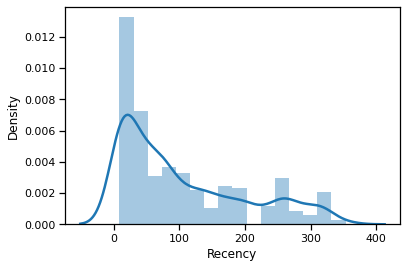

In [ ]:
#Recency distribution plot
import seaborn as sns
x = RFMScores['Recency']

ax = sns.distplot(x)  # data is right skewed

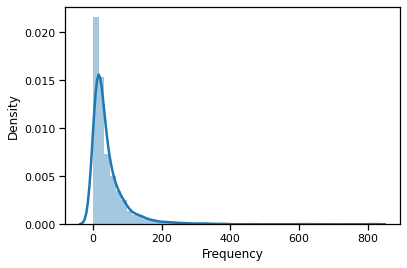

In [ ]:
#Frequency distribution plot, taking observations which have frequency less than 1000
import seaborn as sns
x = RFMScores.query('Frequency < 1000')['Frequency']

ax = sns.distplot(x)

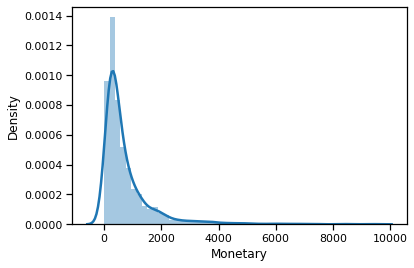

In [ ]:
#Monateray distribution plot, taking observations which have monetary value less than 10000
import seaborn as sns
x = RFMScores.query('Monetary < 10000')['Monetary']

ax = sns.distplot(x)

In [ ]:
#Split into four segments using quantiles
# we are subdiving the data into four groups based on recency, frequency and monetary values calculated earlier
## we can choose any quantile value (depends on need)
quantiles = RFMScores.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict() # we are converting quantiles into dictionary

In [ ]:
quantiles

{'Recency': {0.25: 17.0, 0.5: 73.0, 0.75: 166.0},
 'Frequency': {0.25: 13.0, 0.5: 26.0, 0.75: 55.0},
 'Monetary': {0.25: 241.85500000000002, 0.5: 434.9, 0.75: 909.64}}

In [ ]:
#Functions to create R, F and M segments
# we are creating functions to assign  an integer value to each of the segment choosen
# we have given 1 to to the lowest value of recency that is 0.25 in RSCoring function as lower the value better it is  as it means that the customer is more
# is more engaged with the brand

# In FScoring function 1 is given to the highest value of the frequency and monetary as higher the value better it is
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [ ]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
# we are assigning 1,2 ,3 and 4 numbers to the various range of values of recency, frequency and monetary using above two functions
RFMScores['R'] = RFMScores['Recency'].apply(RScoring, args=('Recency',quantiles,))
RFMScores['F'] = RFMScores['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
RFMScores['M'] = RFMScores['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12347.0,39,76,1769.71,2,1,1
12348.0,75,9,537.44,3,4,2
12349.0,18,73,1757.55,2,1,1
12352.0,72,22,426.58,2,3,3
12354.0,232,58,1079.40,4,1,1


In [ ]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
# concatenating individual values of R,F and M values for each customer
# we are converting these individual values to string function using map method to further check 
#what group or segment a customer belongs to
RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
RFMScores['RFMScore'] = RFMScores[['R', 'F', 'M']].sum(axis = 1)
RFMScores.head()

# RFMScore is to check the loyality or engagement of a customer
# Lower the RFMScore of a customer ..... more loyal or engage he would be

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12347.0,39,76,1769.71,2,1,1,211,4
12348.0,75,9,537.44,3,4,2,342,9
12349.0,18,73,1757.55,2,1,1,211,4
12352.0,72,22,426.58,2,3,3,233,8
12354.0,232,58,1079.40,4,1,1,411,6


In [ ]:
#Assign Loyalty Level to each customer
Loyalty_Level = ['Platinum', 'Gold', 'Silver', 'Bronze']  # we are creating four levels
# platinum means the customer is very loyal and bronze means he is on the verge of churning out
# For this we will use pandas q cut method ... first argument depicts the name of the dataframe column that is RFMScore
# second argument is q cut count which is kind of representing bins containing same number of record for each bin
# Q CUT Method 
Score_cuts = pd.qcut(RFMScores.RFMScore, q = 4, labels = Loyalty_Level) 
RFMScores['RFM_Loyalty_Level'] = Score_cuts.values
RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,12347.0,39,76,1769.71,2,1,1,211,4,Platinum
1,12348.0,75,9,537.44,3,4,2,342,9,Silver
2,12349.0,18,73,1757.55,2,1,1,211,4,Platinum
3,12352.0,72,22,426.58,2,3,3,233,8,Gold
4,12354.0,232,58,1079.40,4,1,1,411,6,Gold


#### So customer id getting loyalty level as platinum and gold are the ones to whom company wants to give profit so that they will be with them more time period and one with the bronze and silver would be churned out.

## Question 2:

- Perform Clustering on the above RFM dataset (for entire timespan) and calculate the Silhouette Coefficient


#### Transforming or normalizing the data before clustering and using total timespan dataframe that is RFMScores

### Log Transformation

#### As previously the graph for recency, frequency and monetary value was right skewed .... so we need to normalize it using log transformation method

In [ ]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
RFMScores['Recency'] = [handle_neg_n_zero(x) for x in RFMScores.Recency]
RFMScores['Monetary'] = [handle_neg_n_zero(x) for x in RFMScores.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = RFMScores[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)
Log_Tfd_Data

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,3.664,4.331,7.479
12348.0,4.317,2.197,6.287
12349.0,2.890,4.290,7.472
12352.0,4.277,3.091,6.056
12354.0,5.447,4.060,6.984
...,...,...,...
18273.0,5.549,0.000,3.932
18276.0,3.761,2.639,5.817
18278.0,4.290,2.197,5.158


In [ ]:
Log_Tfd_Data

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,3.664,4.331,7.479
12348.0,4.317,2.197,6.287
12349.0,2.890,4.290,7.472
12352.0,4.277,3.091,6.056
12354.0,5.447,4.060,6.984
...,...,...,...
18273.0,5.549,0.000,3.932
18276.0,3.761,2.639,5.817
18278.0,4.290,2.197,5.158


#### Graphs after log transformation

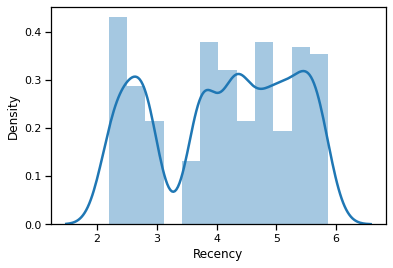

In [ ]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
ax = sns.distplot(Recency_Plot)

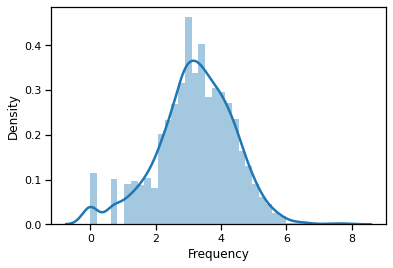

In [ ]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
ax = sns.distplot(Frequency_Plot)

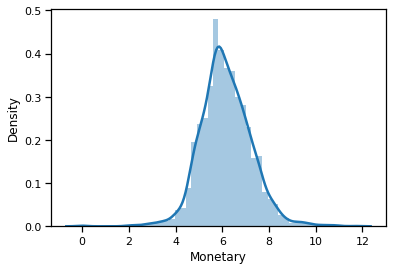

In [ ]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
ax = sns.distplot(Monetary_Plot)

#### Now the data is normally distributed


### Scaling the Transformed data using standard scaler and then transforming into dataframe

In [ ]:
from sklearn.preprocessing import StandardScaler

#Bring the data on same scale
scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(Log_Tfd_Data)

#Transform it back to dataframe
Scaled_Data = pd.DataFrame(Scaled_Data, index = RFMScores.index, columns = Log_Tfd_Data.columns)
Scaled_Data

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,-0.391231,0.946137,1.224734
12348.0,0.181770,-0.859300,0.124638
12349.0,-1.070409,0.911450,1.218274
12352.0,0.146670,-0.102945,-0.088552
12354.0,1.173334,0.716862,0.767899
...,...,...,...
18273.0,1.262838,-2.718038,-2.048790
18276.0,-0.306115,-0.485353,-0.309125
18278.0,0.158078,-0.859300,-0.917315


#### Elbow method to find the number of clusters

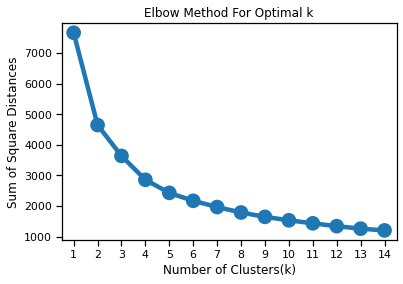

In [ ]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(Scaled_Data)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

**From the graph we can see that the number of clusters is 3**


In [ ]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(Scaled_Data)

#Find the clusters for the observation given in the dataset
RFMScores['Cluster'] = KMean_clust.labels_
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster
CustomerID,,,,,,,,,,
12347.0,39,76,1769.71,2,1,1,211,4,Platinum,1
12348.0,75,9,537.44,3,4,2,342,9,Silver,2
12349.0,18,73,1757.55,2,1,1,211,4,Platinum,1
12352.0,72,22,426.58,2,3,3,233,8,Gold,2
12354.0,232,58,1079.40,4,1,1,411,6,Gold,2


In [ ]:
RFMScores.head()
#only take CustomerID, RFMScore and Cluster

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster
CustomerID,,,,,,,,,,
12347.0,39,76,1769.71,2,1,1,211,4,Platinum,1
12348.0,75,9,537.44,3,4,2,342,9,Silver,2
12349.0,18,73,1757.55,2,1,1,211,4,Platinum,1
12352.0,72,22,426.58,2,3,3,233,8,Gold,2
12354.0,232,58,1079.40,4,1,1,411,6,Gold,2


### Silhouette Coefficient

In [ ]:
# The silhouette_score gives the 
    # average value for all the samples.
    # Silhouette Coefficient is a metric used to calculate the goodness of a clustering technique.
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(Scaled_Data, RFMScores['Cluster'])
  
print("For no of clusters =", k,
          " The average silhouette_score is :", silhouette_avg)

For no of clusters = 14  The average silhouette_score is : 0.292344206827632


In [ ]:
RFMScores['RFM_Loyalty_Level']

CustomerID
12347.0    Platinum
12348.0      Silver
12349.0    Platinum
12352.0        Gold
12354.0        Gold
             ...   
18273.0      Bronze
18276.0        Gold
18278.0      Silver
18283.0    Platinum
18287.0        Gold
Name: RFM_Loyalty_Level, Length: 2555, dtype: category
Categories (4, object): ['Platinum' < 'Gold' < 'Silver' < 'Bronze']

In [ ]:
RFMScores['RFM_Loyalty_Level'].unique

<bound method Series.unique of CustomerID
12347.0    Platinum
12348.0      Silver
12349.0    Platinum
12352.0        Gold
12354.0        Gold
             ...   
18273.0      Bronze
18276.0        Gold
18278.0      Silver
18283.0    Platinum
18287.0        Gold
Name: RFM_Loyalty_Level, Length: 2555, dtype: category
Categories (4, object): ['Platinum' < 'Gold' < 'Silver' < 'Bronze']>

### LABEL - ENCODING


In [ ]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()


RFMScores['RFM_Loyalty_Level']= label_encoder.fit_transform(RFMScores['RFM_Loyalty_Level'])


In [ ]:
RFMScores['RFM_Loyalty_Level']

CustomerID
12347.0    2
12348.0    3
12349.0    2
12352.0    1
12354.0    1
          ..
18273.0    0
18276.0    1
18278.0    3
18283.0    2
18287.0    1
Name: RFM_Loyalty_Level, Length: 2555, dtype: int64

### TRAIN-TEST SPLIT

**We are testing few models and will further chch which one gives the best prediction**

In [ ]:
#Dividing the dataset into independent(features) and dependent variable(Target)
print("*"*120)
print('SPLITTNG THE DATASET INTO FEATURES AND TARGET'.center(50))
print("*"*120)

X = RFMScores.drop('Cluster', axis = 1)
y = RFMScores['Cluster']

************************************************************************************************************************
  SPLITTNG THE DATASET INTO FEATURES AND TARGET   
************************************************************************************************************************


In [ ]:
x

CustomerID
12347.0    1769.71
12348.0     537.44
12349.0    1757.55
12352.0     426.58
12354.0    1079.40
            ...   
18273.0      51.00
18276.0     335.86
18278.0     173.90
18283.0    1282.32
18287.0     835.96
Name: Monetary, Length: 2529, dtype: float64

In [ ]:
y


CustomerID
12347.0    1
12348.0    2
12349.0    1
12352.0    2
12354.0    2
          ..
18273.0    0
18276.0    0
18278.0    0
18283.0    1
18287.0    1
Name: Cluster, Length: 2555, dtype: int32

**Training and testing the model using train test split library and dividing the dataset into train(80%) and test(20%) data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=101,test_size=0.3)

#### FEATURE SCALING

In [ ]:
print("*"*120)
print('STANDARDIZING THE DATASET'.center(50))
print("*"*120)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

************************************************************************************************************************
            STANDARDIZING THE DATASET             
************************************************************************************************************************


#### TRAIN THE MODEL USING DECISION TREE

In [ ]:
print("*"*120)
print('TRAINING THE DATASET USING DECISION TREE ALGORITHM'.center(50))
print("*"*120)


from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

************************************************************************************************************************
TRAINING THE DATASET USING DECISION TREE ALGORITHM
************************************************************************************************************************


In [ ]:
print("*"*120)
print('ACCURACY SCORE OF THE MODEL USING DECISION TREE ALGORITHM'.center(50))
print("*"*120)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
acc_dtc = accuracy_score(y_test, y_pred_dtc)*100
print(acc_dtc)

************************************************************************************************************************
ACCURACY SCORE OF THE MODEL USING DECISION TREE ALGORITHM
************************************************************************************************************************
95.04563233376793


************************************************************************************************************************
PLOT FOR THE CONFUSION MATRIX OF THE MODEL USING DECISION TREE ALGORITHM
************************************************************************************************************************


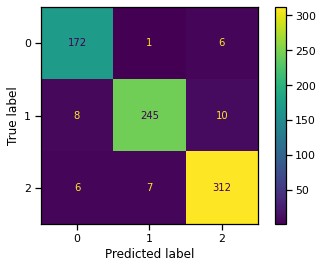

In [ ]:
print("*"*120)
print('PLOT FOR THE CONFUSION MATRIX OF THE MODEL USING DECISION TREE ALGORITHM'.center(50))
print("*"*120)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dtc, X_test, y_test)

In [ ]:
print("*"*120)
print('CLASSIFICATION REPORT OF THE MODEL USING DECISION TREE ALGORITHM'.center(50))
print("*"*120)

class_report = classification_report(y_test, y_pred_dtc)

print(class_report)

************************************************************************************************************************
CLASSIFICATION REPORT OF THE MODEL USING DECISION TREE ALGORITHM
************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       179
           1       0.97      0.93      0.95       263
           2       0.95      0.96      0.96       325

    accuracy                           0.95       767
   macro avg       0.95      0.95      0.95       767
weighted avg       0.95      0.95      0.95       767



************************************************************************************************************************
     PLOTTING THE DECISION TREE FOR THE MODEL     
************************************************************************************************************************


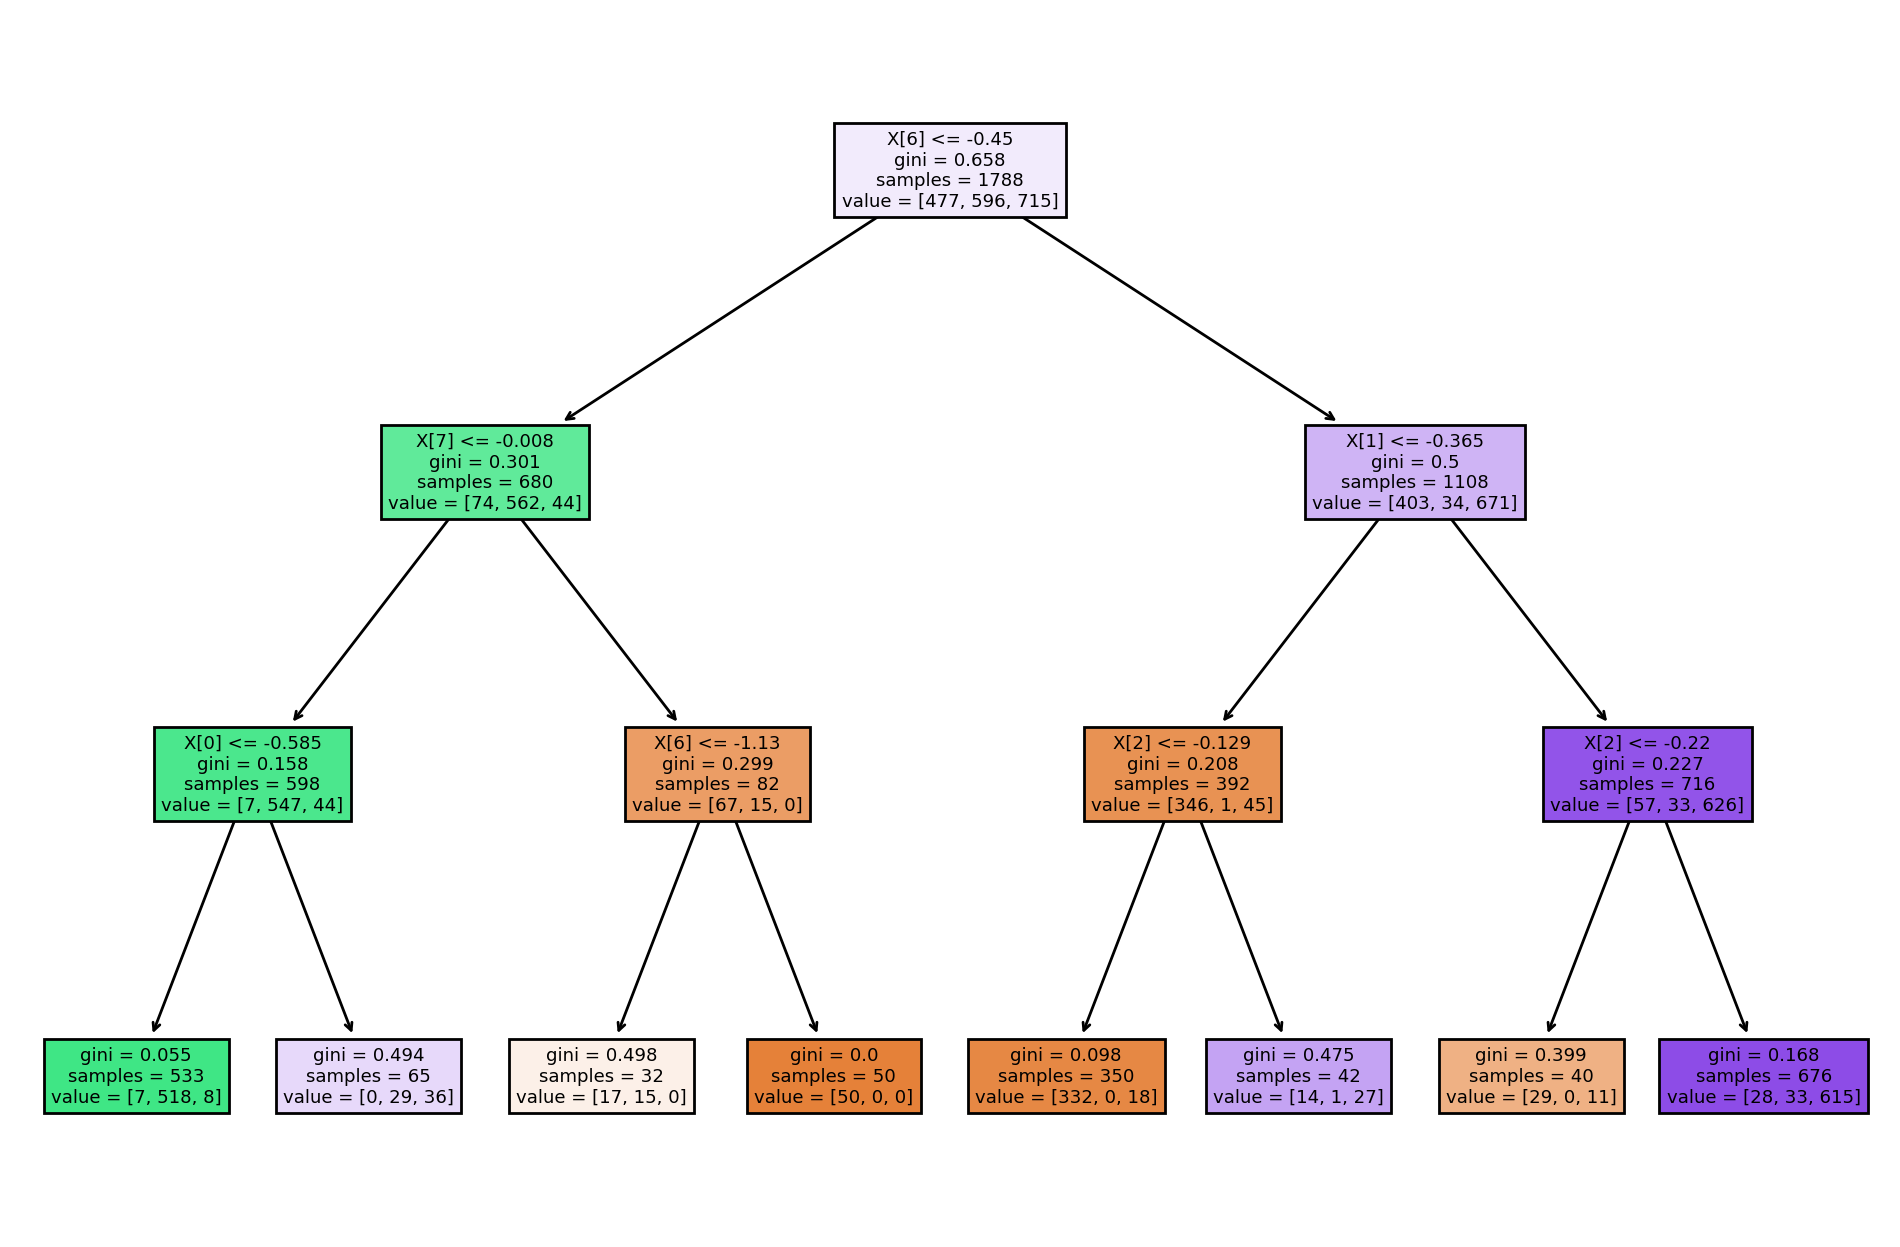

In [ ]:
print("*"*120)
print('PLOTTING THE DECISION TREE FOR THE MODEL'.center(50))
print("*"*120)

from sklearn.tree import plot_tree



plt.figure(figsize=(12,8), dpi=200)

pruned_dtc = DecisionTreeClassifier(max_depth=3)
pruned_dtc.fit(X_train, y_train)
y_pred_dtc = pruned_dtc.predict(X_test)

plot_tree(pruned_dtc, filled = True);

#### TRAIN THE MODEL USING  RANDOM FOREST

In [ ]:
print("*"*120)
print('TRAINING THE DATASET USING RANDOM FOREST ALGORITHM'.center(50))
print("*"*120)

from sklearn.ensemble import RandomForestClassifier  
Randomclassifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
Randomclassifier.fit(X_train, y_train)
y_pred= Randomclassifier.predict(X_test) 

************************************************************************************************************************
TRAINING THE DATASET USING RANDOM FOREST ALGORITHM
************************************************************************************************************************


In [ ]:
print("*"*120)
print('ACCURACY OF THE MODEL USING RANDOM FOREST ALGORITHM'.center(50))
print("*"*120)


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
acc_random = accuracy_score(y_test, y_pred)*100
print(acc_random)

************************************************************************************************************************
ACCURACY OF THE MODEL USING RANDOM FOREST ALGORITHM
************************************************************************************************************************
96.08865710560626


************************************************************************************************************************
PLOT FOR THE CONFUSION MATRIX OF THE MODEL USING RANDOM FOREST CLASSIFIER
************************************************************************************************************************


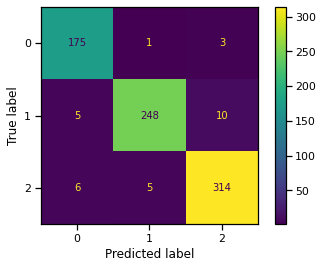

In [ ]:
print("*"*120)
print('PLOT FOR THE CONFUSION MATRIX OF THE MODEL USING RANDOM FOREST CLASSIFIER'.center(50))
print("*"*120)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(Randomclassifier, X_test, y_test)

In [ ]:
print("*"*120)
print('CLASSIFICATION REPORT OF THE MODEL USING RANDOM FOREST CLASSIFIER'.center(50))
print("*"*120)

class_report = classification_report(y_test, y_pred)

print(class_report)

************************************************************************************************************************
CLASSIFICATION REPORT OF THE MODEL USING RANDOM FOREST CLASSIFIER
************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       179
           1       0.98      0.94      0.96       263
           2       0.96      0.97      0.96       325

    accuracy                           0.96       767
   macro avg       0.96      0.96      0.96       767
weighted avg       0.96      0.96      0.96       767



#### TRAIN THE MODEL USING KNN (K-Nearest Neighbor)

In [ ]:
print("*"*120)
print('TRAINING THE DATASET USING KNN ALGORITHM'.center(50))
print("*"*120)


from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(X_train, y_train)
#Predicting the test set result  
y_pred= classifier.predict(X_test) 

************************************************************************************************************************
     TRAINING THE DATASET USING KNN ALGORITHM     
************************************************************************************************************************


In [ ]:
print("*"*120)
print('ACCURACY OF THE MODEL USING KNN ALGORITHM'.center(50))
print("*"*120)

acc_knn = accuracy_score(y_test, y_pred)*100
print(acc_knn)

************************************************************************************************************************
    ACCURACY OF THE MODEL USING KNN ALGORITHM     
************************************************************************************************************************
94.52411994784876


************************************************************************************************************************
PLOT FOR THE CONFUSION MATRIX OF THE MODEL USING  KNN
************************************************************************************************************************


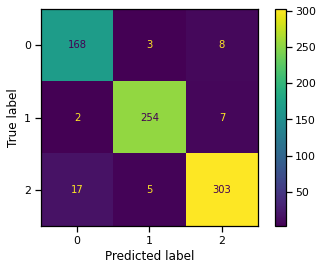

In [ ]:
print("*"*120)
print('PLOT FOR THE CONFUSION MATRIX OF THE MODEL USING  KNN'.center(50))
print("*"*120)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test)

In [ ]:
print("*"*120)
print('CLASSIFICATION REPORT OF THE MODEL USING KNN'.center(50))
print("*"*120)

class_report = classification_report(y_test, y_pred)

print(class_report)

************************************************************************************************************************
   CLASSIFICATION REPORT OF THE MODEL USING KNN   
************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       179
           1       0.97      0.97      0.97       263
           2       0.95      0.93      0.94       325

    accuracy                           0.95       767
   macro avg       0.94      0.95      0.94       767
weighted avg       0.95      0.95      0.95       767



In [ ]:
df1 = pd.DataFrame({'DECISION TREE': [acc_dtc],'KNN':[acc_knn],"RANDOM FOREST":[acc_random]})
df1

,DECISION TREE,KNN,RANDOM FOREST
0,95.045632,94.52412,96.088657


#### So Decision Tree gives the best accuracy. So we will use Decision Tree model for churn prediction

### BG/NBD AND GAMMA-GAMMA MODEL

#### Checking for number of unique customers

In [ ]:
#Print records pertaining unique Customer IDs
print(data1['CustomerID'].nunique())

2555


In [ ]:
#Add a new column depicting total sales
data1['Total_Sales'] = data1['Quantity'] * data1['UnitPrice']
necessary_cols = ['CustomerID', 'InvoiceDate', 'Total_Sales']
data1 = data1[necessary_cols]
data1.head()

,CustomerID,InvoiceDate,Total_Sales
39641,17213.0,2010-12-21 09:34:00,17.70
39642,17213.0,2010-12-21 09:34:00,9.90
39643,17213.0,2010-12-21 09:34:00,17.85
39644,17213.0,2010-12-21 09:34:00,15.00
39645,17213.0,2010-12-21 09:34:00,17.70


#### Finding the Last order date using max function for finding the recency value later

In [ ]:
#Check the Last order date
last_order_date = data1['InvoiceDate'].max()
print(last_order_date)
print("--------------------------------------")
print(data1[(data1['CustomerID']==12346)]) # Finding the details of a particular customer 

2011-11-30 17:37:00
--------------------------------------
Empty DataFrame
Columns: [CustomerID, InvoiceDate, Total_Sales]
Index: []


#### Installing the lifetimes library which contains function and metric to estimate CLV.

In [ ]:
pip install lifetimes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Finding the frequency, recency, age and the monetary value of a customer using the built - in function from lifetimes package

In [ ]:
from lifetimes.plotting import *
from lifetimes.utils import *
#Built-in utility functions from lifetimes package to transform the transactional data (one row per purchase) 
#into summary data (a frequency, recency, age and monetary).
# summary_data_from_transaction_data is used to find the frequency, recency, T which is basically the
# age (like difference between the recent purchase date of a customer and the latest order date) and the monetary value using the
# the following parameters

lifetime_data = summary_data_from_transaction_data(data1, 'CustomerID', 'InvoiceDate', monetary_value_col='Total_Sales', observation_period_end='2011-12-9')
lifetime_data.reset_index().head()

,CustomerID,frequency,recency,T,monetary_value
0,12347.0,1.0,278.0,317.0,1294.32
1,12348.0,1.0,243.0,318.0,310.00
2,12349.0,0.0,0.0,18.0,0.00
3,12352.0,1.0,190.0,262.0,266.25
4,12354.0,0.0,0.0,232.0,0.00


#### Plotting the graph which depicts the purchase of the customers

count    2555.000000
mean        1.012524
std         2.301101
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        45.000000
Name: frequency, dtype: float64
------------------FINDING THE PERCENTAGE OF ONE TIME BUYERS---------------------
Percentage of customers purchase the item only once: 57.42 %


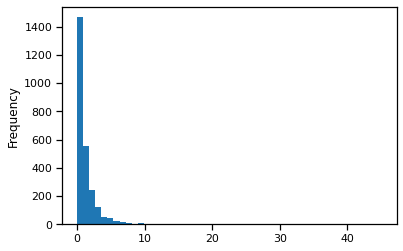

In [ ]:
%matplotlib inline
#Create histogram to find out how many customers purchased item only once.
lifetime_data['frequency'].plot(kind='hist', bins=50)
print(lifetime_data['frequency'].describe())
print("------------------FINDING THE PERCENTAGE OF ONE TIME BUYERS---------------------")
one_time_buyers = round(sum(lifetime_data['frequency'] == 0)/float(len(lifetime_data))*(100),2)
# Sum of the instances whose frequecy is 0 / total number of instatnces and then multiplying by 100 to get the percentage value
# Also rounding the percentage value by 2
print("Percentage of customers purchase the item only once:", one_time_buyers ,"%")

- Analysis is made on 4338 customers (count = 4338.0000) and we can see that on an average customer makes approximately 3 repeated purchases
- From the graph we can observe that the number of customers buying the item once is more than the ones buying items frequently

In [ ]:
#Frequency/Recency Analysis Using the BG/NBD Model
# Fitting the BG/NBD Model to find the values of recency and frequency
from lifetimes import BetaGeoFitter
bgf = BetaGeoFitter(penalizer_coef=0.1)  # creating an object of betageofitter
# penalizer_coefficient is to control the scaling of the parameters associated with the model
bgf.fit(lifetime_data['frequency'], lifetime_data['recency'], lifetime_data['T'])
print(bgf)

<lifetimes.BetaGeoFitter: fitted with 2555 subjects, a: 0.00, alpha: 84.92, b: 0.00, r: 0.49>


In [ ]:
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,4.876308e-01,0.019919,0.448590,0.526671
alpha,8.492417e+01,4.425354,76.250477,93.597863
a,2.556031e-19,NaN,NaN,NaN
b,4.702910e-09,NaN,NaN,NaN


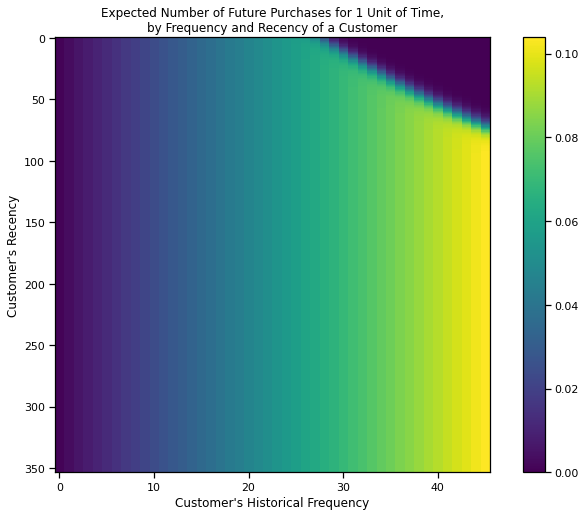

In [ ]:
#Visualizing our frequency/recency matrix
# Here we are visualizing the relationship between recency and frequency using heat map
%matplotlib inline
import matplotlib.pyplot as plt
from lifetimes.plotting import plot_frequency_recency_matrix
# we are using the plot_frequency_recency_matrix class or function from lifetimes.plotting package
fig = plt.figure(figsize=(12,8))
plot_frequency_recency_matrix(bgf)

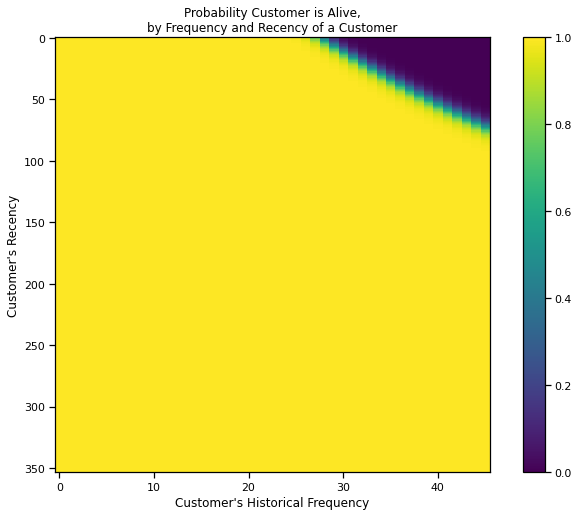

In [ ]:
#predict if the customers are surely alive:
# Here we are finding the probability of customer being alive or not
from lifetimes.plotting import plot_probability_alive_matrix
fig = plt.figure(figsize=(12,8))
plot_probability_alive_matrix(bgf)

In [ ]:
#Predict future transaction in next 10 days i.e.top 10 customers that the model expects them to make purchases 
#in the next 10 days, based on historical data

t = 10
lifetime_data['pred_num_txn'] = round(bgf.conditional_expected_number_of_purchases_up_to_time(t, lifetime_data['frequency'], lifetime_data['recency'], lifetime_data['T']),2)
lifetime_data.sort_values(by='pred_num_txn', ascending=False).head(10).reset_index()

,CustomerID,frequency,recency,T,monetary_value,pred_num_txn
0,14911.0,45.0,344.0,353.0,872.305333,1.04
1,17841.0,34.0,310.0,320.0,381.936765,0.85
2,12748.0,36.0,343.0,353.0,329.118333,0.83
3,14606.0,26.0,343.0,352.0,146.602692,0.61
4,15311.0,23.0,341.0,351.0,602.440435,0.54
5,12971.0,22.0,343.0,353.0,158.960000,0.51
6,14527.0,19.0,306.0,318.0,153.424211,0.48
7,13089.0,19.0,306.0,317.0,736.978421,0.48
8,14096.0,7.0,90.0,101.0,4633.457143,0.40
9,14646.0,17.0,337.0,353.0,6403.103529,0.40


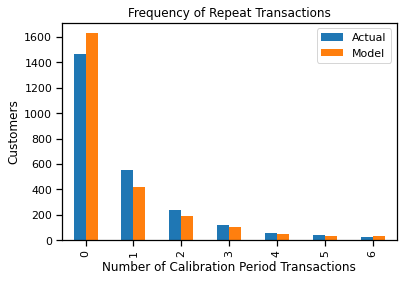

In [ ]:
#Assessing model fit
from lifetimes.plotting import plot_period_transactions
plot_period_transactions(bgf)

# we can see that the model is performing very well as the acutal and predicted lines are almost same

In [ ]:
#Customer's future transaction prediction for next 10 days for a particular customer using customer id

t = 10
individual = lifetime_data.loc[14911]
bgf.predict(t, individual['frequency'], individual['recency'], individual['T'])

#OBSERVATION: Our model predicts that customer 14911’s future transaction is appx 3 in 10 days.

1.038710213859766

In [ ]:
#Check if there is correlation between monetary value and frequency in order to use gamma gamma model for CLV calculation.
lifetime_data[['monetary_value', 'frequency']].corr()

,monetary_value,frequency
monetary_value,1.000000,0.378305
frequency,0.378305,1.000000


In [ ]:
#Shortlist customers who had at least one repeat purchase with the company. 
shortlisted_customers = lifetime_data[lifetime_data['frequency']>0]
print(shortlisted_customers.head().reset_index())
print("-----------------------------------------")
print("The Number of Returning Customers are: ",len(shortlisted_customers))

   CustomerID  frequency  recency      T  monetary_value  pred_num_txn
0     12347.0        1.0    278.0  317.0     1294.320000          0.04
1     12348.0        1.0    243.0  318.0      310.000000          0.04
2     12352.0        1.0    190.0  262.0      266.250000          0.04
3     12362.0        3.0    183.0  225.0      705.366667          0.11
4     12364.0        1.0     38.0   78.0      299.060000          0.09
-----------------------------------------
The Number of Returning Customers are:  1088


In [ ]:
#Train gamma-gamma model by taking into account the monetary_value.
from lifetimes import GammaGammaFitter
ggf = GammaGammaFitter(penalizer_coef = 0)
ggf.fit(shortlisted_customers['frequency'],
        shortlisted_customers['monetary_value'])
print(ggf)

<lifetimes.GammaGammaFitter: fitted with 1088 subjects, p: 2.35, q: 3.33, v: 456.93>


In [ ]:
#After applying Gamma-Gamma model, now we can estimate average transaction value for each customer. 
print(ggf.conditional_expected_average_profit(
        lifetime_data['frequency'],
        lifetime_data['monetary_value']
    ).head(10))

CustomerID
12347.0    879.508136
12348.0    385.165713
12349.0    461.001021
12352.0    363.193711
12354.0    461.001021
12360.0    461.001021
12361.0    461.001021
12362.0    644.680710
12363.0    461.001021
12364.0    379.671456
dtype: float64


In [ ]:
lifetime_data['pred_txn_value'] = round(ggf.conditional_expected_average_profit(
        lifetime_data['frequency'],
        lifetime_data['monetary_value']), 2)
lifetime_data.reset_index().head()

,CustomerID,frequency,recency,T,monetary_value,pred_num_txn,pred_txn_value
0,12347.0,1.0,278.0,317.0,1294.32,0.04,879.51
1,12348.0,1.0,243.0,318.0,310.00,0.04,385.17
2,12349.0,0.0,0.0,18.0,0.00,0.05,461.00
3,12352.0,1.0,190.0,262.0,266.25,0.04,363.19
4,12354.0,0.0,0.0,232.0,0.00,0.02,461.00


In [ ]:
#Calculate Customer Lifetime Value
lifetime_data['CLV'] = round(ggf.customer_lifetime_value(
    bgf, #the model to use to predict the number of future transactions
    lifetime_data['frequency'],
    lifetime_data['recency'],
    lifetime_data['T'],
    lifetime_data['monetary_value'],
    time=12, # months
    discount_rate=0.01 # monthly discount rate ~ 12.7% annually
), 2)

lifetime_data.drop(lifetime_data.iloc[:, 0:6], inplace=True, axis=1)

lifetime_data.sort_values(by='CLV', ascending=False).head(50).reset_index()

,CustomerID,CLV
0,14646.0,81922.10
1,14096.0,55968.89
2,18102.0,45030.42
3,17450.0,41400.60
4,17949.0,36151.47
5,14911.0,30282.86
6,13694.0,23050.78
7,14156.0,21693.09
8,14298.0,15249.86
9,15061.0,14164.55


In [ ]:
og_sheet = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Online_Retail.csv')
og_sheet 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [ ]:
#select rows with where CustomrerID is 14646.0
top_clv = og_sheet[og_sheet['CustomerID'] == 14646.0]
top_clv.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
37952,539491,21981,PACK OF 12 WOODLAND TISSUES,12,20-12-2010 10:09,0.29,14646.0,Netherlands
37953,539491,21986,PACK OF 12 PINK POLKADOT TISSUES,12,20-12-2010 10:09,0.29,14646.0,Netherlands
37954,539491,22720,SET OF 3 CAKE TINS PANTRY DESIGN,2,20-12-2010 10:09,4.95,14646.0,Netherlands
37955,539491,21931,JUMBO STORAGE BAG SUKI,1,20-12-2010 10:09,1.95,14646.0,Netherlands
37956,539491,22613,PACK OF 20 SPACEBOY NAPKINS,2,20-12-2010 10:09,0.85,14646.0,Netherlands


In [ ]:
#drop columns 'InvoiceNo', 'StockCode', 'Description', 'Country'
top_clv = top_clv.drop(['StockCode', 'Description', 'Country'], axis=1)

In [ ]:
top_clv['Total_Sales'] = top_clv['Quantity'] * top_clv['UnitPrice']

In [ ]:
from lifetimes.plotting import *
from lifetimes.utils import *



lifetime_data = summary_data_from_transaction_data(top_clv, 'CustomerID', 'InvoiceDate', monetary_value_col='Total_Sales', observation_period_end='2011-12-9')


lifetime_data.reset_index().head()

,CustomerID,frequency,recency,T,monetary_value
0,14646.0,46.0,353.0,354.0,5957.961304


In [ ]:
top_clv

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total_Sales
37952,539491,12,20-12-2010 10:09,0.29,14646.0,3.48
37953,539491,12,20-12-2010 10:09,0.29,14646.0,3.48
37954,539491,2,20-12-2010 10:09,4.95,14646.0,9.90
37955,539491,1,20-12-2010 10:09,1.95,14646.0,1.95
37956,539491,2,20-12-2010 10:09,0.85,14646.0,1.70
...,...,...,...,...,...,...
534958,581176,96,07-12-2011 15:19,0.72,14646.0,69.12
534959,581176,96,07-12-2011 15:19,0.72,14646.0,69.12
534960,581176,72,07-12-2011 15:19,0.36,14646.0,25.92
534961,581176,72,07-12-2011 15:19,0.36,14646.0,25.92


In [434]:
import numpy as np
top_clv["frequency"] = np.arange(1,1+len(top_clv.index))
top_clv

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total_Sales,frequency
37952,539491,12,20-12-2010 10:09,0.29,14646.0,3.48,1
37953,539491,12,20-12-2010 10:09,0.29,14646.0,3.48,2
37954,539491,2,20-12-2010 10:09,4.95,14646.0,9.90,3
37955,539491,1,20-12-2010 10:09,1.95,14646.0,1.95,4
37956,539491,2,20-12-2010 10:09,0.85,14646.0,1.70,5
...,...,...,...,...,...,...,...
534958,581176,96,07-12-2011 15:19,0.72,14646.0,69.12,2081
534959,581176,96,07-12-2011 15:19,0.72,14646.0,69.12,2082
534960,581176,72,07-12-2011 15:19,0.36,14646.0,25.92,2083
534961,581176,72,07-12-2011 15:19,0.36,14646.0,25.92,2084


In [438]:
top_clv["InvoiceDate"] = pd.to_datetime(top_clv["InvoiceDate"])
type(top_clv["InvoiceDate"])
top_clv["InvoiceDate"].dt.date

37952     2010-12-20
37953     2010-12-20
37954     2010-12-20
37955     2010-12-20
37956     2010-12-20
             ...    
534958    2011-07-12
534959    2011-07-12
534960    2011-07-12
534961    2011-07-12
537783    2011-08-12
Name: InvoiceDate, Length: 2085, dtype: object

In [439]:
best_customer= top_clv.groupby('InvoiceDate').agg({'frequency': lambda x: x.sum(),
    
                                                       'Total_Sales': lambda x: x.sum()})
# best_customer['date'] = best_customer.index
best_customer['date'] = top_clv["InvoiceDate"].dt.date

In [440]:
best_customer

,frequency,Total_Sales,date
InvoiceDate,,,
2010-12-20 10:09:00,136,70.96,NaN
2010-12-21 15:05:00,2349,8520.92,NaN
2011-01-06 09:18:00,10465,1799.60,NaN
2011-01-06 10:24:00,10634,3623.20,NaN
2011-01-14 12:24:00,8690,10389.06,NaN
...,...,...,...
2011-11-23 11:06:00,21934,1835.96,NaN
2011-12-05 10:10:00,9630,1792.72,NaN
2011-12-05 10:13:00,63986,14415.74,NaN


In [441]:
top_clv

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total_Sales,frequency
37952,539491,12,2010-12-20 10:09:00,0.29,14646.0,3.48,1
37953,539491,12,2010-12-20 10:09:00,0.29,14646.0,3.48,2
37954,539491,2,2010-12-20 10:09:00,4.95,14646.0,9.90,3
37955,539491,1,2010-12-20 10:09:00,1.95,14646.0,1.95,4
37956,539491,2,2010-12-20 10:09:00,0.85,14646.0,1.70,5
...,...,...,...,...,...,...,...
534958,581176,96,2011-07-12 15:19:00,0.72,14646.0,69.12,2081
534959,581176,96,2011-07-12 15:19:00,0.72,14646.0,69.12,2082
534960,581176,72,2011-07-12 15:19:00,0.36,14646.0,25.92,2083
534961,581176,72,2011-07-12 15:19:00,0.36,14646.0,25.92,2084


In [454]:
best_customer["recency"].isna().sum()

0

In [ ]:
best_customer["recency"] = best_customer['date'].diff()
best_customer["recency"]=best_customer["recency"]. astype(str)
best_customer["recency"]= best_customer["recency"].str.slice(0,-4,1)
best_customer = best_customer.iloc[1: , :]
best_customer["recency"]=best_customer["recency"]. astype('int64')
best_customer.head()

In [ ]:
#calculate customer lifetime value using recency and frequency
best_customer["customer_lifetime_value"] = best_customer["frequency"] * best_customer["recency"]

In [ ]:
best_customer

In [ ]:
#train test split 
from tkinter import Y
from sklearn.model_selection import train_test_split
#drop date column
Y = best_customer["customer_lifetime_value"]
X = best_customer.drop(["date","customer_lifetime_value"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
#use random forest regression model to predict customer lifetime value
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred


In [ ]:
from sklearn.metrics import r2_score as r2
r2(y_test, y_pred)

In [ ]:
y_test

In [ ]:
finaldf = pd.DataFrame() 
finaldf["predicted"] = np.array(y_pred)
finaldf["actual"] = np.array(y_test)


finaldf.head()

In [ ]:
#stock graph actual vs predicted customer lifetime value
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(finaldf['actual'],label = 'actual')
plt.plot(finaldf['predicted'],label = 'predicted')
plt.legend()
plt.show()



# THANK YOU